<a href="https://www.kaggle.com/code/kamaliloganathan/edtech-company-analysis?scriptVersionId=107748565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst/leads_reasons_for_no_interest.csv
/kaggle/input/data-analyst/leads_interaction_details.csv
/kaggle/input/data-analyst/leads_demo_watched_details.csv
/kaggle/input/data-analyst/sales_managers_assigned_leads_details.csv
/kaggle/input/data-analyst/leads_basic_details.csv


Edtech company

In all analysis there is 6 phase,they are ask, prepare, process, analyse, share and act.

# Phase 1 - Ask

Business objective: To increase the number of enrolled users. And analyze various aspects of customer acqusition to see new users growth in the company.

What is the problem are you trying to slove?

The efforts to find out the leads stage scope and customers interactions in-depth to find out what actually is lacking and what helps to acceralate the users growth. With the help of visualization and key findings that will help to resolve the issue.

# Phase 2 ,3,4- Prepare,process and analyze for each table.

# 1.LEAD BASIC DETAILS TABLE

In [2]:
#import all the libraries 

import numpy as np #mathametical calculations
import pandas as pd #data processing
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns

In [3]:
#import datasets
leads_basic_details= pd.read_csv("../input/data-analyst/leads_basic_details.csv")
sm_assigned_lead_details=pd.read_csv("../input/data-analyst/sales_managers_assigned_leads_details.csv")
lead_interaction_details=pd.read_csv("../input/data-analyst/leads_interaction_details.csv")
leads_demo_watched_details = pd.read_csv("../input/data-analyst/leads_demo_watched_details.csv")
leads_reason_for_no_interaction = pd.read_csv("../input/data-analyst/leads_reasons_for_no_interest.csv")


In [4]:
#view the shape of datasets
print("leads_basic_details:",leads_basic_details.shape)
print("sm_assigned_lead_details:",sm_assigned_lead_details.shape)
print("lead_interaction_details:",lead_interaction_details.shape)
print("leads_demo_watched_details:",leads_demo_watched_details.shape)
print("leads_reason_for_no_interaction:",leads_reason_for_no_interaction.shape)


leads_basic_details: (360, 7)
sm_assigned_lead_details: (360, 5)
lead_interaction_details: (2192, 6)
leads_demo_watched_details: (194, 4)
leads_reason_for_no_interaction: (294, 4)


In [5]:
#to the informations about the datasets
leads_basic_details.info()
sm_assigned_lead_details.info()
lead_interaction_details.info()
leads_demo_watched_details.info()
leads_reason_for_no_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1),

In [6]:
#first lets take leads_basic_details to prepare
leads_basic_details.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [7]:
#view the top few data
leads_basic_details.head(10)

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
5,USR1006,16,MALE,Kochi,Intermediate,Doctor,user_referrals
6,USR1007,16,FEMALE,Hyderabad,Intermediate,Professor/Faculty,social_media
7,USR1008,20,MALE,Hyderabad,B.Tech,Business,website
8,USR1009,20,MALE,Hyderabad,B.Tech,Lawyer,website
9,USR1010,20,FEMALE,Hyderabad,B.Tech,IT Employee,website


In [8]:
#view last few data
leads_basic_details.tail(10)

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
350,USR1351,25,FEMALE,Visakhapatnam,Looking for Job,Business,SEO
351,USR1352,18,MALE,Visakhapatnam,B.Tech,Business,email_marketing
352,USR1353,24,MALE,Visakhapatnam,Looking for Job,Business,SEO
353,USR1354,18,MALE,Visakhapatnam,B.Tech,Business,email_marketing
354,USR1355,24,FEMALE,Visakhapatnam,Looking for Job,Lawyer,social_media
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing
359,USR1360,16,MALE,Mumbai,Intermediate,Government Employee,social_media


In [9]:
#to check is there is any null
leads_basic_details.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [10]:
#to describe the data
leads_basic_details.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


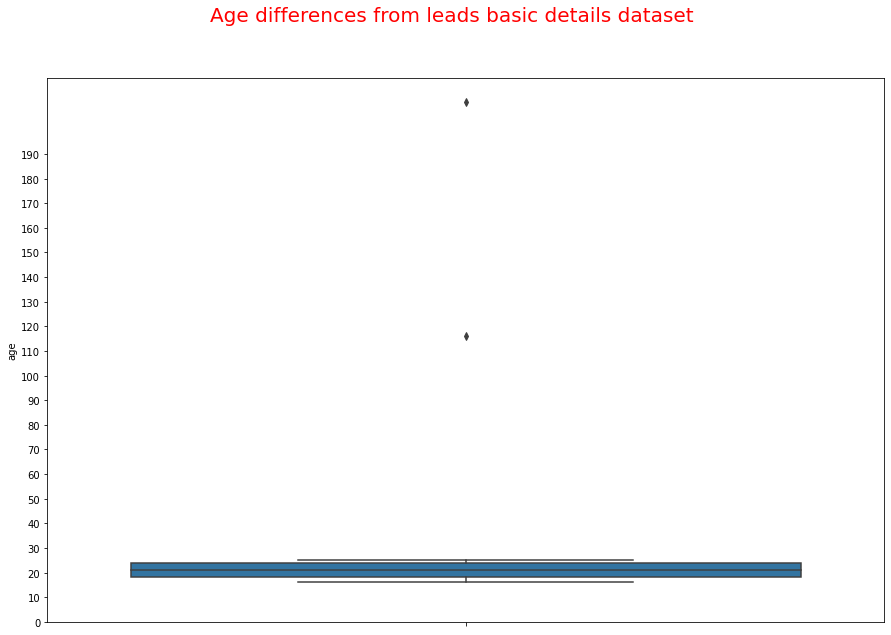

In [11]:
#to view age differentiate via visualisation
plt.figure(figsize=(15,10))
plt.suptitle("Age differences from leads basic details dataset",fontsize=20, fontweight = 10, color = "red")
ticks = np.arange(0,200,10)
label= ["{}".format(i) for i in ticks]
sns.boxplot(y=leads_basic_details.age)
plt.yticks(ticks,label)
plt.show()

*  From above vizualisation we can say that there are two ages above 100 are outliers.
* Majority of the leads age fall between 15 to 25.

In [12]:
#Remove outliers
leads_basic_details_age_outliers = leads_basic_details[leads_basic_details.age>leads_basic_details.age.quantile(0.90)]
leads_basic_details_age_outliers

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


The above two are the outliers.

In [13]:
#Removing outliers and group it with unique values.
leads_basic_details = leads_basic_details.drop([leads_basic_details_age_outliers.index[0],leads_basic_details_age_outliers.index[1]])
leads_basic_details.age.unique()

array([16, 20, 21, 22, 25, 18, 24])

Text(10.049999999999997, 0.5, 'Number of Leads')

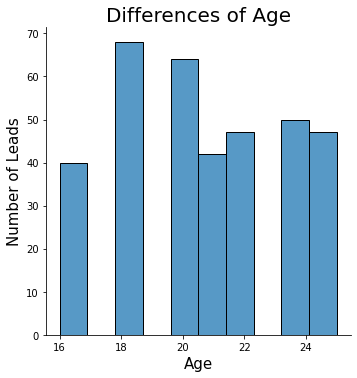

In [14]:
#Vizualization after removing the outliers
sns.displot(leads_basic_details["age"])
plt.title('Differences of Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Leads', fontsize=15)

**In above viz you can see the maximum number of leads are between 18 to 20 years old**

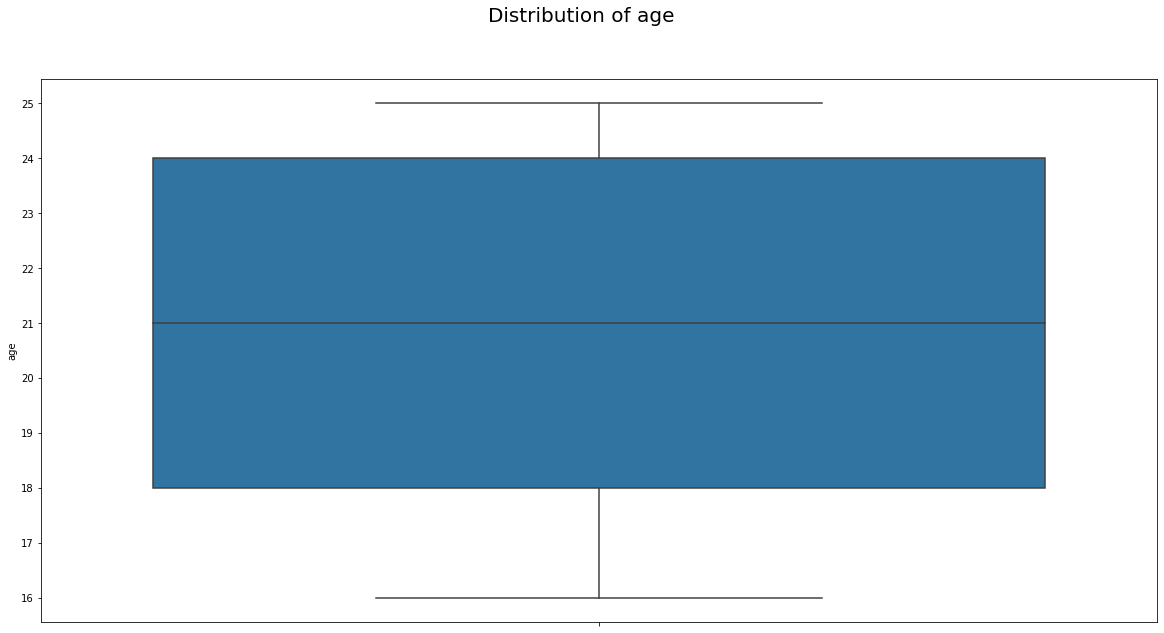

In [15]:
# Plotting boxplot for age distribution after removing the outliers
plt.figure(figsize=(20,10))
plt.suptitle("Distribution of age", fontsize= 20)
ticks = np.arange(0,30,1)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=leads_basic_details.age)
plt.show()

Above viz shows that the maximum number leads are between 18 to 24 years old.


Now the data is free from outliers.


Now selecting our target audience under the assumption that target audience ages will range from 15 to 30 we have maximum age till 25 and minimum age is 16 so subsetting our dataset accordingly.

In [16]:
leads_basic_details_targeted = leads_basic_details.query('age <= 30')

In [17]:
#count of genders
leads_basic_details_targeted["gender"].value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

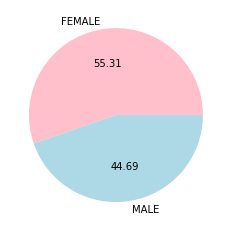

In [18]:
#to view the gender via visualization
colors=["#FFC0CB","#ADD8E6"]
pie_chart_gender = leads_basic_details_targeted.groupby('gender').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='',colors=colors)


Here we can assume that there are more female leads than male.

In [19]:
# checking the education column
leads_basic_details_targeted.current_education.unique()

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed', 'Intermediate Completed'], dtype=object)

'Intermediate' and 'Intermediate Completed' means the same thing so we replace 'Intermediate Completed' by 'Intermediate'

In [20]:
#replacing and counting
leads_basic_details_targeted['current_education'].replace({'Intermediate Completed':'Intermediate'}, inplace=True)
leads_basic_details_targeted.current_education.value_counts()

B.Tech             139
Looking for Job    117
Intermediate        52
Degree              42
10th Completed       8
Name: current_education, dtype: int64

Text(0.5, 1.0, 'Current Education')

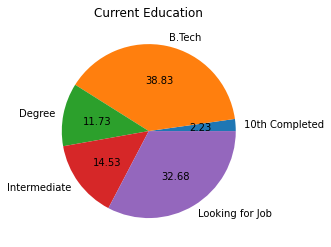

In [21]:
#view in viz
pie_chart_current_education = leads_basic_details_targeted.groupby('current_education').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_current_education.set_title("Current Education")

**Majority of the leads are pursuing B.Tech (38.83%) or are Looking for job (32.68%)**

In [22]:
# checking the lead_gen_source column
leads_basic_details_targeted.lead_gen_source.unique()

array(['social_media', 'user_referrals', 'website', 'SEO',
       'email_marketing'], dtype=object)

Text(0.5, 1.0, 'Lead Gen Source')

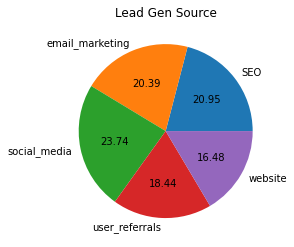

In [23]:
#to view in viz
pie_chart_lead_gen_source = leads_basic_details_targeted.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_lead_gen_source.set_title("Lead Gen Source")

From the plot we can see that 23.74% of the leads came to know about the firm through social media and 20.95% came to know about the firm through SEO and 20.39% leads know from website making SEO and website the next important source for lead generated.

# 2.SALES MANAGER ASSIGNED LEADS DETAILS TABLE


In [24]:
#to view the top 10 data
sm_assigned_lead_details.head(10)

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
5,SNR501MG,JNR1001MG,1/8/2022,2,USR1006
6,SNR501MG,JNR1001MG,1/8/2022,2,USR1007
7,SNR501MG,JNR1001MG,1/8/2022,2,USR1008
8,SNR501MG,JNR1001MG,1/8/2022,2,USR1009
9,SNR501MG,JNR1001MG,1/8/2022,2,USR1010


In [25]:
#to view the info about the table
sm_assigned_lead_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [26]:
#grouping senior and junior by their id
sm_assigned_lead_details.groupby([ 'snr_sm_id','jnr_sm_id']).size()

snr_sm_id  jnr_sm_id
SNR501MG   JNR1001MG    34
           JNR1002MG    20
           JNR1003MG    20
           JNR1004MG    20
SNR502MG   JNR1005MG    20
           JNR1006MG    20
           JNR1007MG    20
           JNR1008MG    20
SNR503MG   JNR1009MG    20
           JNR1010MG    21
           JNR1011MG    26
           JNR1012MG    31
SNR504MG   JNR1013MG    20
           JNR1014MG    20
           JNR1015MG    21
           JNR1016MG    27
dtype: int64

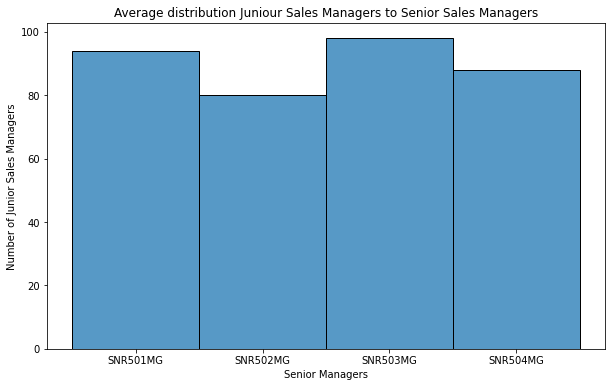

In [27]:
#number of ssm assigned to jsm via viz
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.histplot(data=sm_assigned_lead_details["snr_sm_id"],bins=4)
ax.set(title="Average distribution Juniour Sales Managers to Senior Sales Managers",ylabel="Number of Junior Sales Managers",xlabel="Senior Managers");

Here we have 4 senior Managers and their assigned junior managers from the barplot.

In [28]:
#total counts of leads
total_leads = lead_interaction_details.lead_id.nunique()
total_leads 

358

In [29]:
#to view the successful conversion 
successfull_conv = lead_interaction_details.query('call_reason == "successful_conversion"')['lead_id'].nunique()
successfull_conv 

64

In [30]:
#in percentage
percent_conv = (successfull_conv/total_leads) * 100
percent_conv

17.877094972067038

**Approximately 17.88% of the leads got converted successfully**

# 3.LEAD INTERACTION DETAILS TABLE

In [31]:
#TO VIEW THE TOP 10 DATA
lead_interaction_details.head(10)

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
5,JNR1001MG,USR1002,awareness,1/6/2022,successful,followup_for_consideration
6,JNR1001MG,USR1002,consideration,1/7/2022,successful,interested_for_conversion
7,JNR1001MG,USR1002,consideration,1/7/2022,successful,followup_for_conversion
8,JNR1001MG,USR1002,consideration,1/7/2022,successful,followup_for_conversion
9,JNR1001MG,USR1002,conversion,1/7/2022,successful,successful_conversion


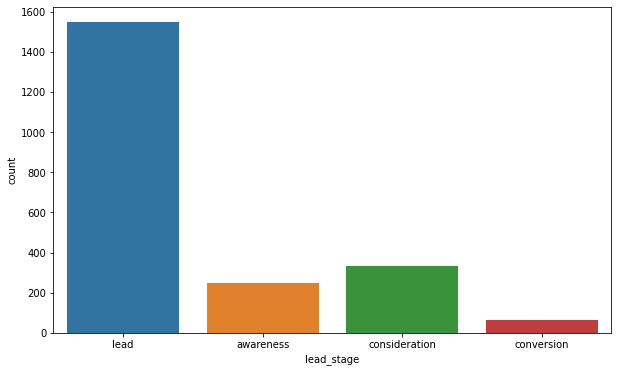

In [32]:
#lead stages are grouped and to view in viz
countplot, ax = plt.subplots(figsize = (10,6))
ax =sns.countplot(x = 'lead_stage', data=lead_interaction_details)

we can see that the number of leads are high when compared to the number of other conversions.

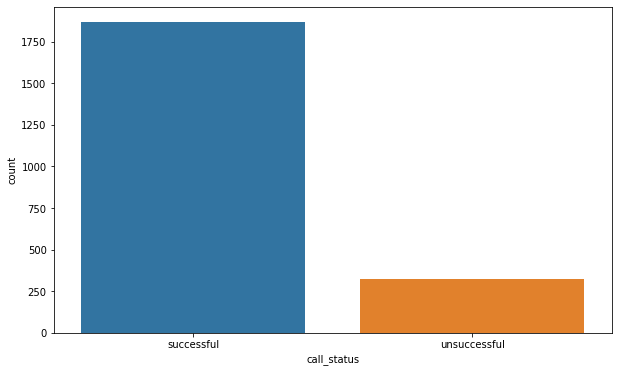

In [33]:
#to check the count between successful and unsuccessful through viz
countplot, ax = plt.subplots(figsize = (10,6))
ax =sns.countplot(x = 'call_status', data=lead_interaction_details)

we can view that call_status is successsful for most of the leads which means that most of the Lead are avaliable for Conversation on Call.

In [34]:
# merging leads_demo_watched_details with leads_interaction_details in lead_id column and view t0p 10 dta
leads_demo_interaction_merged = pd.merge(leads_demo_watched_details, lead_interaction_details, how='inner', on = 'lead_id')
leads_demo_interaction_merged.head(10)

,lead_id,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion
5,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,followup_for_conversion
6,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,followup_for_conversion
7,USR1002,1/4/2022,Telugu,42,JNR1001MG,conversion,1/7/2022,successful,successful_conversion
8,USR1003,1/7/2022,Telugu,81,JNR1001MG,lead,1/4/2022,unsuccessful,lead_introduction
9,USR1003,1/7/2022,Telugu,81,JNR1001MG,lead,1/5/2022,successful,lead_introduction


In [35]:
#describe
leads_demo_interaction_merged.describe()

,watched_percentage
count,1578.000000
mean,57.120406
std,42.527034
min,2.000000
25%,30.000000
50%,60.000000
75%,77.000000
max,510.000000


In [36]:
#to view the size of successful and unsuccessful call groupby lead stages
leads_demo_interaction_merged.groupby([ 'lead_stage','call_status']).size()

lead_stage     call_status 
awareness      successful      245
               unsuccessful      5
consideration  successful      290
               unsuccessful     41
conversion     successful       64
lead           successful      778
               unsuccessful    155
dtype: int64

**From the above result we can see that the number of successful calls are more than unsuccessful calls.**

In [37]:
#in-depth view
leads_demo_interaction_merged.groupby([ 'call_status','call_reason']).size()

call_status   call_reason               
successful    demo_not_attended             390
              demo_schedule                 194
              followup_for_consideration     48
              followup_for_conversion       169
              interested_for_conversion     121
              lead_introduction             194
              post_demo_followup            197
              successful_conversion          64
unsuccessful  demo_not_attended              45
              demo_schedule                  16
              followup_for_consideration      5
              followup_for_conversion        20
              interested_for_conversion      21
              lead_introduction              94
dtype: int64

**From the above output we can see that more focus should be given by sales managers in earlier stages of acquisition process.**

<AxesSubplot:xlabel='lead_stage', ylabel='watched_percentage'>

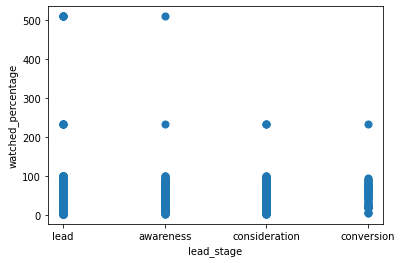

In [38]:
#viz
leads_demo_interaction_merged.plot.scatter(x = 'lead_stage', y = 'watched_percentage', s=50)

**With the above result we can conclude that we can give more importance to "consideration" and "conversion" stage.**

# 4.LEADS DEMO WATCH DETAILS TABLE

In [39]:
#TO VIEW THE TOP 10 DATA
leads_demo_watched_details.head(10)

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
5,USR1007,1/11/2022,English,52
6,USR1008,1/8/2022,Telugu,41
7,USR1009,1/10/2022,Telugu,50
8,USR1010,1/12/2022,Telugu,48
9,USR1011,1/17/2022,Telugu,44


In [40]:
#describe
leads_demo_watched_details.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


**The max is more than 100% which is incorrect**

In [41]:
#to get infomation about data
leads_demo_watched_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


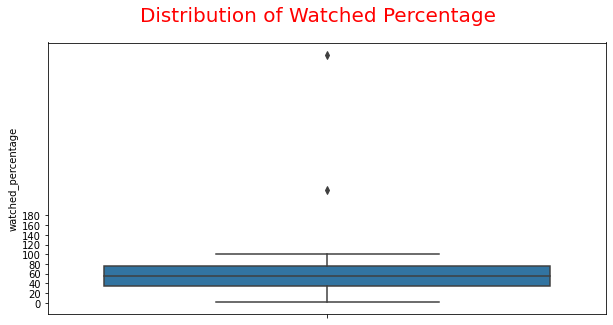

In [42]:
# to view in viz before checking error
plt.figure(figsize=(10,5))
plt.suptitle("Distribution of Watched Percentage", fontsize= 20, fontweight = 5, color = 'red')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=leads_demo_watched_details.watched_percentage)
plt.show()

From the above result, we can say there are 2 outliers greater than 100%.

In [43]:
#outliers
leads_demo_watched_details.query('watched_percentage > 100')
leads_demo_watched_details = leads_demo_watched_details.query('watched_percentage <= 100')

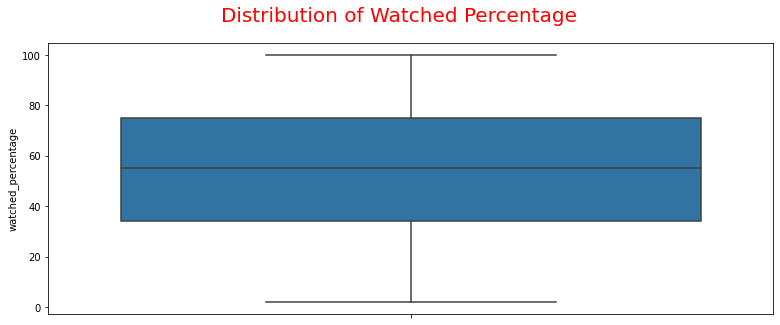

In [44]:
# viz after cleaning the data
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched Percentage", fontsize= 20, fontweight = 5, color = 'red')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=leads_demo_watched_details.watched_percentage)
plt.show()

Text(9.924999999999997, 0.5, 'Number of Leads watching video')

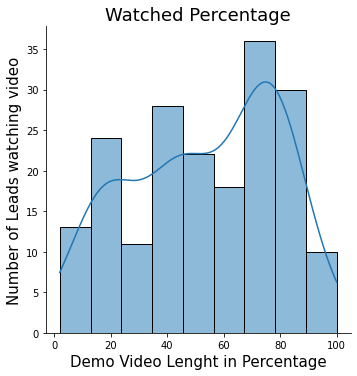

In [45]:
#viz for watched percentage
sns.displot(leads_demo_watched_details["watched_percentage"],kde=True)
plt.title('Watched Percentage', fontsize=18)
plt.xlabel('Demo Video Lenght in Percentage', fontsize=15)
plt.ylabel('Number of Leads watching video', fontsize=15)

In above result, we can see that more than 35 leads watched 70-80% of the demo videos.

fully covered demo video was seen by almost 10 leads.

The histogram shows that more than 60% of the demo video was wathed by majority of the leads

In [46]:
#merging and viewing top 10 data.
leads_basic_demo_watched_merged = pd.merge(leads_demo_watched_details, leads_basic_details_targeted, how='inner', on = 'lead_id')
leads_basic_demo_watched_merged.head(10)

,lead_id,demo_watched_date,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,1/4/2022,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,1/7/2022,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,1/2/2022,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,1/3/2022,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,1/12/2022,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals
5,USR1007,1/11/2022,English,52,16,FEMALE,Hyderabad,Intermediate,Professor/Faculty,social_media
6,USR1008,1/8/2022,Telugu,41,20,MALE,Hyderabad,B.Tech,Business,website
7,USR1009,1/10/2022,Telugu,50,20,MALE,Hyderabad,B.Tech,Lawyer,website
8,USR1010,1/12/2022,Telugu,48,20,FEMALE,Hyderabad,B.Tech,IT Employee,website
9,USR1011,1/17/2022,Telugu,44,20,FEMALE,Hyderabad,B.Tech,Private Employee,website


In [47]:
#grouped by language and current city
leads_basic_demo_watched_merged.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

From the result we can see that demo videos are watched mostly in English in all city.

Max cities are bengaluru and visakhapatnam from english language.

Text(0.5, 1.0, 'Demo Language')

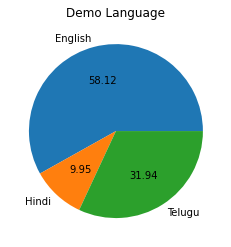

In [48]:
#viz based of languages
pie_chart_language = leads_basic_demo_watched_merged.groupby('language').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_language.set_title("Demo Language")

**Demo videos are mostly watched in English language (58.12%) followed by Telegu (31.94%) and  least viewed in Hindi (9.95%).**

In [49]:
# Grouping leads by cities
leads_wrt_cities = leads_basic_demo_watched_merged.groupby('current_city').size()
leads_wrt_cities

current_city
Bengaluru        32
Chennai          30
Hyderabad        40
Kochi            31
Mumbai           19
Visakhapatnam    39
dtype: int64

Text(0, 0.5, 'Lead Count')

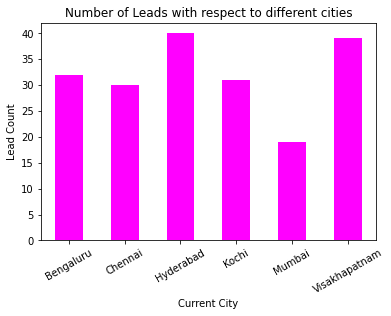

In [50]:
#viz based on grouping the leads by cities
leads_wrt_cities.plot(kind="bar",color="#FF00FF")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of Leads with respect to different cities")
plt.xlabel("Current City")
plt.ylabel("Lead Count")

**From the above viz we can conclude that max leads from "Hyderabad" and min from "Mumbai" city**

# 5.LEADS REASONS FOR NO INTEREST TABLE

In [51]:
#VIEW THE TOP 10 DATA
leads_reason_for_no_interaction.head(10)

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
5,USR1008,NaN,Will join in final year,NaN
6,USR1009,NaN,Student not interested in domain,NaN
7,USR1010,NaN,Will join in final year,NaN
8,USR1014,NaN,Wants offline classes,NaN
9,USR1015,NaN,Wants offline classes,NaN


In [52]:
#infomation about the data
leads_reason_for_no_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [53]:
leads_reason_for_no_interaction.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Can't afford                        44
Cannot afford                        4
No time for student                 27
Student not interested in domain    28
Wants offline classes               56
Will join in final year              5
dtype: int64

"can't afford" and "cannot afford" both are same.So,we merge both the column.

In [54]:
#replace the column
leads_reason_for_no_interaction['reasons_for_not_interested_in_demo'].replace({'Cannot afford':"Can't afford"}, inplace=True)

Text(0.5, 1.0, 'Distribution of reasons for not interested in demo')

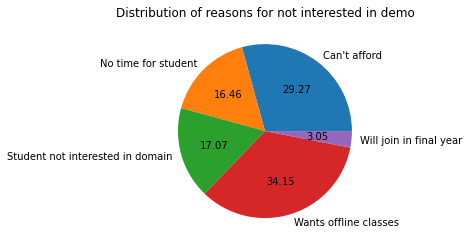

In [55]:
#Viz
pie_chart_reasons_for_not_interested_in_demo = leads_reason_for_no_interaction.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_reasons_for_not_interested_in_demo.set_title("Distribution of reasons for not interested in demo")

Text(0.5, 1.0, 'Distribution of reasons for not interested to consider')

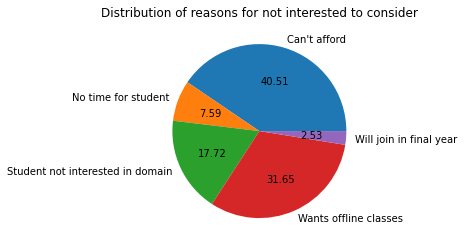

In [56]:
#viz
pie_chart_reasons_for_not_interested_to_consider = leads_reason_for_no_interaction.groupby('reasons_for_not_interested_to_consider').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_reasons_for_not_interested_to_consider.set_title("Distribution of reasons for not interested to consider")

Text(0.5, 1.0, 'Distribution of reasons for not interested to convert')

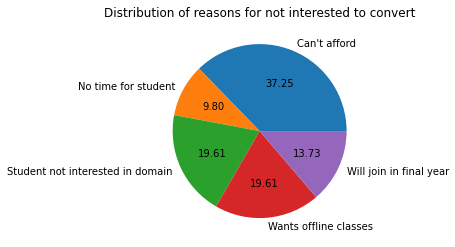

In [57]:
#viz
pie_chart_reasons_for_not_interested_to_convert = leads_reason_for_no_interaction.groupby('reasons_for_not_interested_to_convert').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_chart_reasons_for_not_interested_to_convert.set_title("Distribution of reasons for not interested to convert")

From the pie charts we can observe that the major reason for leads not coverting and dropping out at different stages is affordability and we can also say that the second most important factor behind leads not converting is that most of the leads prefer offline classes.

In [58]:
#Merging reason_for_no_interaction file with lead_basic_details_targeted on lead_id column
leads_no_interset_basic_merged = pd.merge(leads_reason_for_no_interaction, leads_basic_details_targeted, how='inner', on = 'lead_id')
leads_no_interset_basic_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 292 non-null    object
 1   reasons_for_not_interested_in_demo      163 non-null    object
 2   reasons_for_not_interested_to_consider  78 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
 4   age                                     292 non-null    int64 
 5   gender                                  292 non-null    object
 6   current_city                            292 non-null    object
 7   current_education                       292 non-null    object
 8   parent_occupation                       292 non-null    object
 9   lead_gen_source                         292 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [59]:
#demo
leads_no_interset_basic_merged.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    26
B.Tech             16
Degree              3
Intermediate        2
10th Completed      1
Name: current_education, dtype: int64

In [60]:
#consider
leads_no_interset_basic_merged.query('reasons_for_not_interested_to_consider == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    16
Degree              6
Intermediate        4
B.Tech              3
10th Completed      2
Name: current_education, dtype: int64

In [61]:
#convert
leads_no_interset_basic_merged.query('reasons_for_not_interested_to_convert == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    11
B.Tech              7
Degree              1
Name: current_education, dtype: int64

**From the above outputs we can say that most of the leads dropping out due to affordability reasons are either 'Looking for job' or pursuing 'B.Tech' or 'Degree'. Parents income might also play a major role in such cases**

In [62]:
#demo & parennts occupation
leads_no_interset_basic_merged.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business               11
IT Employee             9
Lawyer                  8
Private Employee        2
Doctor                  1
Name: parent_occupation, dtype: int64

In [63]:
#consider & parents occupation
leads_no_interset_basic_merged.query('reasons_for_not_interested_to_consider == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business                6
IT Employee             4
Lawyer                  4
Name: parent_occupation, dtype: int64

In [64]:
#convert & parents occupation
leads_no_interset_basic_merged.query('reasons_for_not_interested_to_convert == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Business               6
IT Employee            6
Government Employee    4
Lawyer                 2
Private Employee       1
Name: parent_occupation, dtype: int64

From the above outputs we can see that most of the leads who dropped out at various stages due to affordability have parents working as:

1.) a government employee or

2.) an IT employee or

3.) in business.

# Phase 5 & 6 - Share & Act

**In share phase, We can share all the assumptions and outputs to the business concerned person.**

# In Act phase,

# Expected outcomes:

# As mentioned above there is scope to increase the number of enrolled members by having some discounts,few gift packages and so on.When seeing the discount or free gifts it attracts to enroll.

# We can introduce new domain knowledge classes.We can get to know that by giving a survey link and ask them to fill out what they want.With the majority of selected  domain can be introduced as a new one.So that we can expect new enrolled members.

# We can also ask existing customers to fill feedback link every weekend.So that we can analyze and improve in futher.


